In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/logistic_v9/v9_after_eda_train.xlsx')

In [4]:
data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/logistic_v9/v9_after_eda_test.xlsx')

In [5]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry

In [6]:
data_test.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry

In [7]:
data_test[['Industry_E-Commerce', 'Industry_Wholesale Trade', 'Drop_category_Neutral/Null']] = 0

In [8]:
data_test = data_test[['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry_E-Commerce',
       'Industry_Finance, Insurance, Real Estate', 'Industry_Manufacturing',
       'Industry_Mining', 'Industry_Retail', 'Industry_Services',
       'Industry_Transportation & Public Utilities', 'Industry_Wholesale',
       'Industry_Wholesale Trade', 'Drop_category_Neutral/Null',
       'Drop_category_Positive']]

In [9]:
data.head(3)

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive
0,0062M00000blHFEQA2,100.0,0.30,1,0,3,0.0,25553.69,3535.52,0,...,0,0,0,0,1,0,0,0,0,1
1,0062M00000bmHA5QAM,100.0,0.61,1,4,1,0.0,22265.24,4292.88,1,...,0,1,0,0,0,0,0,0,0,0
2,0062M00000bmhkAQAQ,100.0,0.55,1,0,2,0.0,25553.69,3535.52,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# data_test.head()

In [11]:
data.shape

(3134, 44)

In [12]:
data_test.shape

(486, 44)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OpportunityID                               3134 non-null   object 
 1   Renewal_PreviousPace                        3134 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 3   Renewal_CountPreviousDeals                  3134 non-null   int64  
 4   Renewal_PreviousCountBounces                3134 non-null   int64  
 5   Renewal_PreviousPosition                    3134 non-null   int64  
 6   Renewal_PreviousHBwLCF                      3134 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 8   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 9   Renewal_TwoWeekBounces                      3134 non-null   int64  
 10  NumberOfBank

In [14]:
data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                       -0.224085
Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
LatestMonth_ReturnItemDays                   -0.015710
Renewal_PreviousHBwLCF                       -0.014973
BankStatement_MA_NumReturnItems              -0.014653
PctAvgDailybalance2AvgMonthlyDeposits        -0.014379
AdjustedMonthlyDeposits                      -0.013616
drop_percent                                 -0.007704
Industry_Manufacturing                       -0.006627
Renewal_PreviousPosition                      0.001372
TwoMonthAvg_AdjustedMonthlyDeposits           0.001698
Renewal_Pr

In [15]:
data.drop(['FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                       -0.224085
Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
LatestMonth_ReturnItemDays                   -0.015710
Renewal_PreviousHBwLCF                       -0.014973
BankStatement_MA_NumReturnItems              -0.014653
PctAvgDailybalance2AvgMonthlyDeposits        -0.014379
AdjustedMonthlyDeposits                      -0.013616
drop_percent                                 -0.007704
Industry_Manufacturing                       -0.006627
Renewal_PreviousPosition                      0.001372
TwoMonthAvg_AdjustedMonthlyDeposits           0.001698
Renewal_Pr

In [16]:
data.shape

(3134, 44)

### Model Training

In [17]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [18]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross','NumberOfBankStatements',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
y = data['WriteOff_YN']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Renewal_PreviousPace                        3134 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 2   Renewal_CountPreviousDeals                  3134 non-null   int64  
 3   Renewal_PreviousCountBounces                3134 non-null   int64  
 4   Renewal_PreviousPosition                    3134 non-null   int64  
 5   Renewal_PreviousHBwLCF                      3134 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 7   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 8   Renewal_TwoWeekBounces                      3134 non-null   int64  
 9   BankStatement_MA_OverdraftDays              3134 non-null   float64
 10  BankStatemen

In [20]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross','NumberOfBankStatements',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
y_test = data_test['WriteOff_YN']

In [22]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2507, 37)
Shape of x_val is: (627, 37)
Shape of x_test is: (486, 37)
----------------------------------------------
Shape of y_train is: (2507,)
Shape of y_val is: (627,)
Shape of y_test is: (486,)


In [23]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [24]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [26]:
# #checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 23.0%
Percentage of  having WriteOFF_YN = 0: 77.0%


In [344]:
#  Information value and weight of evidence
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


In [352]:
iv, woe = iv_woe(data = data, target = 'WriteOff_YN', bins=20, show_woe = False)

Information value of OpportunityID is 1.599503
Information value of Renewal_PreviousPace is 0.003135
Information value of Renewal_PreviousPaidPercentageOfRTR is 0.089509
Information value of Renewal_CountPreviousDeals is 0.062194
Information value of Renewal_PreviousCountBounces is 0.026787
Information value of Renewal_PreviousPosition is 0.002303
Information value of Renewal_PreviousHBwLCF is 0.02062
Information value of Renewal_PreviousAvgMonthRevenue is 0.057557
Information value of Renewal_PreviousAvgDailyBalance is 0.044939
Information value of Renewal_TwoWeekBounces is 0.011913
Information value of NumberOfBankStatements is 0.64516
Information value of BankStatement_MA_OverdraftDays is 0.03384
Information value of BankStatement_MA_NumReturnItems is 0.030286
Information value of Credit_Score__c is 0.066556
Information value of Time_in_Business__c is 0.191343
Information value of BBC_Position__c is 0.001993
Information value of HB_with_LCF_Payment__c is 0.024835
Information value o

In [362]:
iv.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/logistic_v9/Info_value.xlsx',index = False)

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [27]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

816.25

In [28]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3526.08

In [29]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8282.25

In [30]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

3134

In [190]:
weight = []
for i in y_train.index:
  if y_train[i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

2507

In [ ]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [ ]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [ ]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [365]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid =    {'penalty' : ['elasticnet'],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['saga'],
          'max_iter' : [100],
          # 'class_weight': [{0:0.26,1:0.74}],
          'l1_ratio' : [0,0.125, 0.25, 0.5, 0.75, 0.875,1]}

logreg=LogisticRegression()
clf=GridSearchCV(logreg,grid,cv=3,n_jobs=-1,scoring = 'roc_auc')
clf.fit(X_train,y_train,sample_weight = weight)

print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 545.5594781168514, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
accuracy : 0.5168406547539774


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [366]:
# best parameters after training
clf.best_estimator_

LogisticRegression(C=545.5594781168514, l1_ratio=0.25, penalty='elasticnet',
                   solver='saga')

In [367]:
clf.best_params_

{'C': 545.5594781168514,
 'l1_ratio': 0.25,
 'max_iter': 100,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [368]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

In [369]:
# #here test score refers to the cv score
# x_axis = [i for i in range(100)]
# plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
# plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
# plt.legend(["test score", "train score"], loc ="lower right")
# plt.xlabel('iterations')
# plt.ylabel('roc_auc score')
# plt.title('plot for train and cv roc_auc scores')
# plt.show()

In [370]:
from sklearn.metrics import precision_score,recall_score

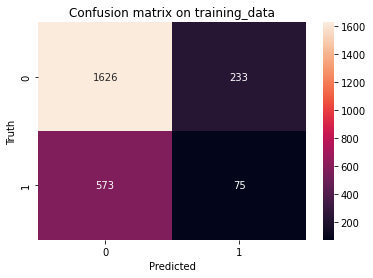

----------------------------
TP: 75
TN: 1626
FP: 233
FN: 573
F1-score: 0.15690376569037656
accuracy: 0.6785001994415636
Precision: 0.2435064935064935
Recall: 0.11574074074074074


In [371]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

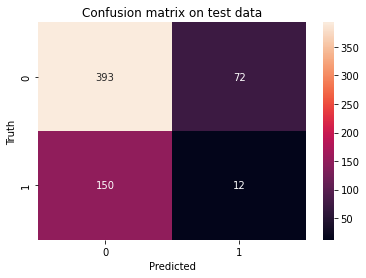

----------------------------
----------------------------
TP: 12
TN: 393
FP: 72
FN: 150
----------------------------
F1-score: 0.0975609756097561
accuracy: 0.645933014354067
Precision: 0.14285714285714285
Recall: 0.07407407407407407


In [372]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

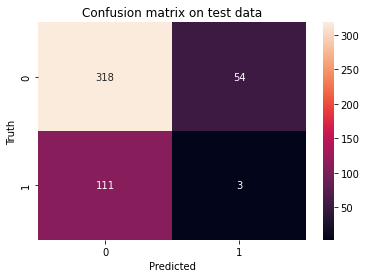

----------------------------
----------------------------
TP: 3
TN: 318
FP: 54
FN: 111
----------------------------
F1-score: 0.03508771929824561
accuracy: 0.6604938271604939
Precision: 0.05263157894736842
Recall: 0.02631578947368421


In [373]:
# on test set 
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

In [374]:
print(len(clf.best_estimator_.coef_[0]))

37


In [375]:
clf.best_estimator_.coef_[0]

array([-5.30815863e-08, -4.72922361e-10, -1.50798262e-09, -9.93126373e-10,
       -1.00760894e-09, -2.70266243e-08,  1.00059389e-06, -1.60567571e-06,
        9.11855008e-12, -5.77626802e-10, -6.55583932e-10, -3.16840757e-07,
       -6.78693239e-09, -9.13604710e-10, -2.20227941e-08,  5.79296487e-07,
       -2.21866208e-06, -3.87420420e-10, -7.23464121e-10,  4.89767374e-11,
       -1.30238808e-10, -6.32836290e-07, -1.14916358e-06, -1.95855937e-08,
       -2.55607908e-10, -3.00527407e-13,  1.00353257e-12, -1.31757327e-11,
       -2.62493101e-11, -2.58915294e-12, -8.82757250e-11, -3.38467269e-10,
       -5.08913444e-11, -1.60216946e-12, -6.96188546e-13, -1.80923846e-12,
       -2.22741848e-10])

Feature: 0, Score: -0.00000005
Feature: 1, Score: -0.00000000
Feature: 2, Score: -0.00000000
Feature: 3, Score: -0.00000000
Feature: 4, Score: -0.00000000
Feature: 5, Score: -0.00000003
Feature: 6, Score: 0.00000100
Feature: 7, Score: -0.00000161
Feature: 8, Score: 0.00000000
Feature: 9, Score: -0.00000000
Feature: 10, Score: -0.00000000
Feature: 11, Score: -0.00000032
Feature: 12, Score: -0.00000001
Feature: 13, Score: -0.00000000
Feature: 14, Score: -0.00000002
Feature: 15, Score: 0.00000058
Feature: 16, Score: -0.00000222
Feature: 17, Score: -0.00000000
Feature: 18, Score: -0.00000000
Feature: 19, Score: 0.00000000
Feature: 20, Score: -0.00000000
Feature: 21, Score: -0.00000063
Feature: 22, Score: -0.00000115
Feature: 23, Score: -0.00000002
Feature: 24, Score: -0.00000000
Feature: 25, Score: -0.00000000
Feature: 26, Score: 0.00000000
Feature: 27, Score: -0.00000000
Feature: 28, Score: -0.00000000
Feature: 29, Score: -0.00000000
Feature: 30, Score: -0.00000000
Feature: 31, Score: -0.

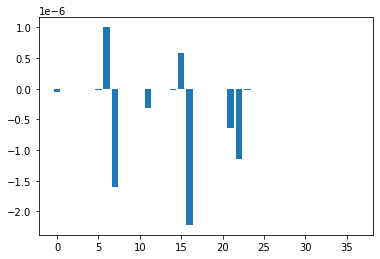

In [376]:
importance = clf.best_estimator_.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.8f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [377]:
# # check for feature importance
# features = X_train.columns
# features
# gain = clf.best_estimator_.feature_importances_
# plt.figure(figsize = (10, 18))
# plt.barh(features , gain)
# plt.xlabel("Score")
# plt.ylabel("features")
# plt.legend(["Feature Importance"])
# plt.show()

# For Train data

In [378]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
755,0
3123,0
221,0
543,0
1395,0
...,...
3092,0
1095,0
1130,0
1294,0


In [379]:
check['Predicted Values'] = predict_y_train

In [380]:
check

,WriteOff_YN,Predicted Values
755,0,0
3123,0,0
221,0,0
543,0,0
1395,0,0
...,...,...
3092,0,0
1095,0,0
1130,0,0
1294,0,0


In [381]:
predict_y_proba_train

array([[0.50271109, 0.49728891],
       [0.50380559, 0.49619441],
       [0.50650239, 0.49349761],
       ...,
       [0.51574183, 0.48425817],
       [0.51035166, 0.48964834],
       [0.50468229, 0.49531771]])

In [382]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [383]:
check['Predicted_Prob_WO = 1'] = write_off1

In [384]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
755,0,0,0.497289
3123,0,0,0.496194
221,0,0,0.493498
543,0,0,0.493731
1395,0,0,0.451815
...,...,...,...
3092,0,0,0.497270
1095,0,0,0.498724
1130,0,0,0.484258
1294,0,0,0.489648


In [385]:
check['OpportunityID'] = None

In [386]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [387]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
755,0,0,0.497289,0062M00000it89gQAA
3123,0,0,0.496194,0062M00000o7yiwQAA
221,0,0,0.493498,0062M00000ePjypQAC
543,0,0,0.493731,0062M00000ibbMMQAY
1395,0,0,0.451815,0062M00000lrPFdQAM
...,...,...,...,...
3092,0,0,0.497270,0062M00000nZiUUQA0
1095,0,0,0.498724,0062M00000ky5tQQAQ
1130,0,0,0.484258,0062M00000kypOWQAY
1294,0,0,0.489648,0062M00000lpNKnQAM


In [388]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9530586939338064
Min_propability_value:  0.006989529521908613


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [389]:
check['Decile'] = None

In [390]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [391]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
755,0,0,0.497289,0062M00000it89gQAA,8
3123,0,0,0.496194,0062M00000o7yiwQAA,7
221,0,0,0.493498,0062M00000ePjypQAC,5
543,0,0,0.493731,0062M00000ibbMMQAY,6
1395,0,0,0.451815,0062M00000lrPFdQAM,1
...,...,...,...,...,...
3092,0,0,0.497270,0062M00000nZiUUQA0,8
1095,0,0,0.498724,0062M00000ky5tQQAQ,9
1130,0,0,0.484258,0062M00000kypOWQAY,3
1294,0,0,0.489648,0062M00000lpNKnQAM,4


In [392]:
check['Predicted_Prob_WO = 1'].nunique()

2507

In [393]:
check['Predicted_Prob_WO = 1'].max()

0.9530586939338064

In [394]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.5008583665814078

In [395]:
len(check[check['Decile']==10])

251

In [396]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [397]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
918,0,0,0.006990,0062M00000jxwDSQAY,1
1220,0,0,0.026767,0062M00000kzxhvQAA,1
1623,0,0,0.030170,0062M00000lvtZKQAY,1
1201,0,0,0.030645,0062M00000kzmISQAY,1
338,0,0,0.058618,0062M00000gAaZvQAK,1
...,...,...,...,...,...
2885,0,1,0.593753,0062M00000nWISkQAO,10
2466,0,1,0.606850,0062M00000n2XHKQA2,10
2500,0,1,0.659552,0062M00000nFbVfQAK,10
1493,0,1,0.749394,0062M00000luEE5QAM,10


In [398]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [399]:
exp_df = check.copy()

In [400]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
918,0,0,0.006990,0062M00000jxwDSQAY,1
1220,0,0,0.026767,0062M00000kzxhvQAA,1
1623,0,0,0.030170,0062M00000lvtZKQAY,1
1201,0,0,0.030645,0062M00000kzmISQAY,1
338,0,0,0.058618,0062M00000gAaZvQAK,1
...,...,...,...,...,...
2885,0,1,0.593753,0062M00000nWISkQAO,10
2466,0,1,0.606850,0062M00000n2XHKQA2,10
2500,0,1,0.659552,0062M00000nFbVfQAK,10
1493,0,1,0.749394,0062M00000luEE5QAM,10


In [401]:
len(exp_df[exp_df['Decile']==1])

251

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [402]:
N = len(exp_df)
N

2507

In [403]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

648

In [404]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    193
1     58
Name: WriteOff_YN, dtype: int64

In [405]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [406]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(58, 62, 56, 54, 67, 75, 68, 77, 66, 65)

In [407]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [408]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(58, 120, 176, 230, 297, 372, 440, 517, 583, 648)

In [409]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [410]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

23.10756972111554 24.701195219123505 22.4 21.51394422310757 26.693227091633467 30.0 27.09163346613546 30.8 26.294820717131476 25.89641434262948


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [411]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [412]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

8.950617283950617 18.51851851851852 27.160493827160494 35.49382716049383 45.83333333333333 57.407407407407405 67.90123456790124 79.78395061728395 89.96913580246914 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [413]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.8950617283950617 0.9259259259259259 0.9053497942386831 0.8873456790123457 0.9166666666666665 0.95679012345679 0.9700176366843034 0.9972993827160493 0.9996570644718793 1.0


In [414]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [415]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.45930953412140746,
 0.47993104622816707,
 0.48716510535264373,
 0.4909030488602609,
 0.4935217361159386,
 0.4953217741812772,
 0.49691791706559096,
 0.49849474393509957,
 0.5008568173212714,
 0.9530586939338064]

In [416]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.006989529521908613,
 0.4593715401457328,
 0.4800144565477037,
 0.48720815807138185,
 0.4909117466701658,
 0.49352240149803184,
 0.49534744127205466,
 0.49692329533014395,
 0.49850778213727187,
 0.5008606904716125]

In [417]:
avg_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[38.66, 47.22, 48.4, 48.92, 49.23, 49.44, 49.61, 49.77, 49.95, 51.38]

In [418]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [419]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [420]:
no_of_opps

[251, 251, 250, 251, 251, 250, 251, 250, 251, 251]

In [421]:
funded_amt

[21494007.0,
 6479295.0,
 4218736.93,
 3780803.0,
 3034000.0,
 2583582.71,
 2290292.0,
 1974859.0,
 2280625.0,
 7446877.0]

In [422]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.38670056, 0.11656956, 0.07589966, 0.06802076, 0.05458496,
       0.04648146, 0.04120484, 0.03552986, 0.04103092, 0.13397741])

In [423]:
gross_amt

[2041891.7200000002,
 689856.29,
 451985.63,
 337036.76,
 354693.42999999993,
 348977.0199999999,
 265946.41,
 250856.02,
 230694.34999999995,
 999353.68]

In [424]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.34195144969405294,
 0.4574802782482238,
 0.5331733916026282,
 0.5896162516981609,
 0.6490160383751234,
 0.7074585095062127,
 0.7519960134050135,
 0.7940063604098391,
 0.8326402735826332,
 1.0]

In [425]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.09499818809959447,
 0.10647088765058545,
 0.10713766643894528,
 0.08914422676875786,
 0.11690620632827947,
 0.13507483954326352,
 0.1161189970536508,
 0.12702477493329903,
 0.10115400383666756,
 0.13419768850754485]

In [426]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,251,58,23.107570,8.950617,21494007.00,0.386701,2041891.72,0.094998,0.341951,4349090.59,38.66,0.70,45.93
1,2,251,62,24.701195,18.518519,6479295.00,0.116570,689856.29,0.106471,0.457480,1548681.72,47.22,45.94,47.99
2,3,250,56,22.400000,27.160494,4218736.93,0.075900,451985.63,0.107138,0.533173,935812.34,48.40,48.00,48.72
3,4,251,54,21.513944,35.493827,3780803.00,0.068021,337036.76,0.089144,0.589616,718768.91,48.92,48.72,49.09
4,5,251,67,26.693227,45.833333,3034000.00,0.054585,354693.43,0.116906,0.649016,748757.93,49.23,49.09,49.35
5,6,250,75,30.000000,57.407407,2583582.71,0.046481,348977.02,0.135075,0.707459,719020.25,49.44,49.35,49.53
6,7,251,68,27.091633,67.901235,2290292.00,0.041205,265946.41,0.116119,0.751996,541987.12,49.61,49.53,49.69
7,8,250,77,30.800000,79.783951,1974859.00,0.035530,250856.02,0.127025,0.794006,524180.55,49.77,49.69,49.85
8,9,251,66,26.294821,89.969136,2280625.00,0.041031,230694.35,0.101154,0.832640,502304.88,49.95,49.85,50.09
9,10,251,65,25.896414,100.000000,7446877.00,0.133977,999353.68,0.134198,1.000000,2246421.02,51.38,50.09,95.31


In [427]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,251,58,23.11,8.95,21494007.00,38.67,2041891.72,9.50,34.20,4349090.59,38.66,0.70,45.93
1,2,251,62,24.70,18.52,6479295.00,11.66,689856.29,10.65,45.75,1548681.72,47.22,45.94,47.99
2,3,250,56,22.40,27.16,4218736.93,7.59,451985.63,10.71,53.32,935812.34,48.40,48.00,48.72
3,4,251,54,21.51,35.49,3780803.00,6.80,337036.76,8.91,58.96,718768.91,48.92,48.72,49.09
4,5,251,67,26.69,45.83,3034000.00,5.46,354693.43,11.69,64.90,748757.93,49.23,49.09,49.35
5,6,250,75,30.00,57.41,2583582.71,4.65,348977.02,13.51,70.75,719020.25,49.44,49.35,49.53
6,7,251,68,27.09,67.90,2290292.00,4.12,265946.41,11.61,75.20,541987.12,49.61,49.53,49.69
7,8,250,77,30.80,79.78,1974859.00,3.55,250856.02,12.70,79.40,524180.55,49.77,49.69,49.85
8,9,251,66,26.29,89.97,2280625.00,4.10,230694.35,10.12,83.26,502304.88,49.95,49.85,50.09
9,10,251,65,25.90,100.00,7446877.00,13.40,999353.68,13.42,100.00,2246421.02,51.38,50.09,95.31


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 10 artists>

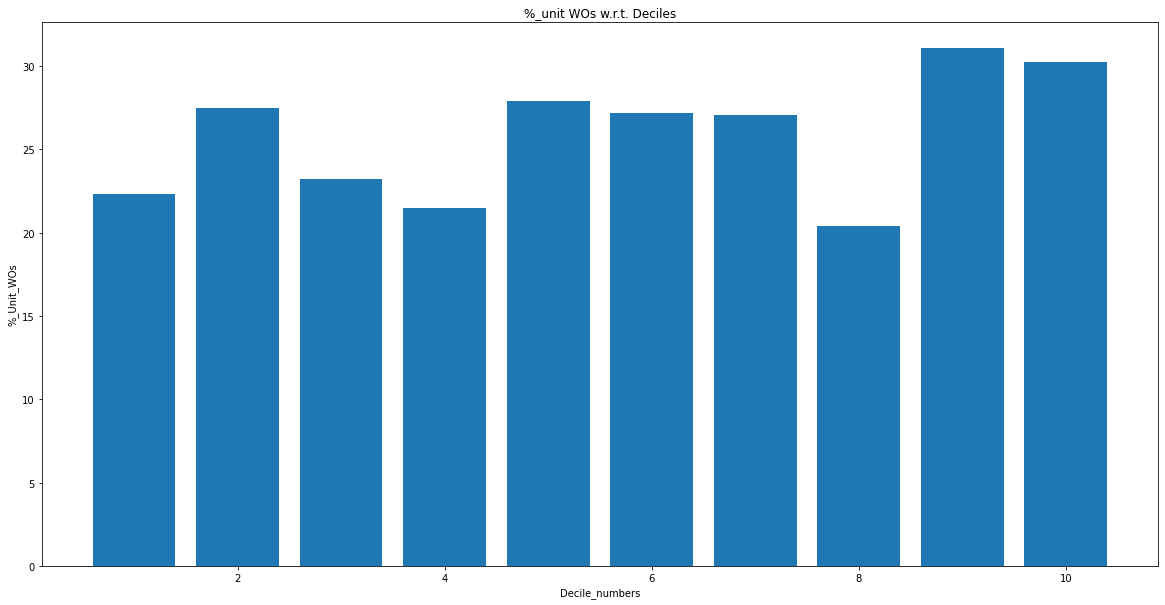

In [254]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

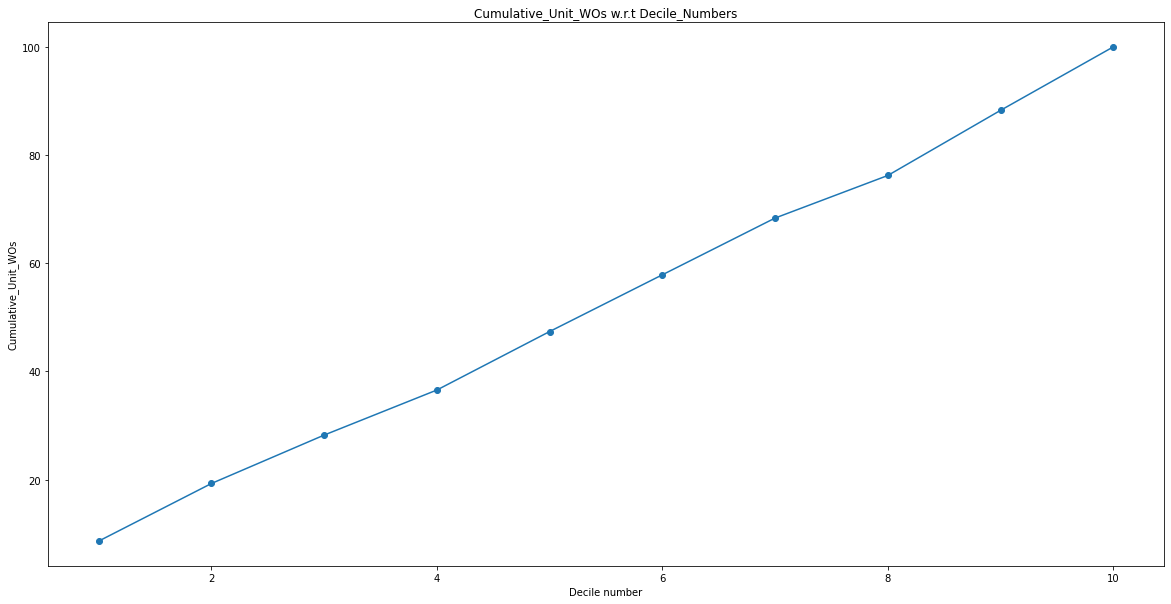

In [255]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [256]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
1786,0
528,0
449,0
1292,1
1097,0
...,...
2684,1
1237,0
2912,1
2721,1


In [257]:
check['Predicted Values'] = predict_y_val

In [258]:
check

,WriteOff_YN,Predicted Values
1786,0,1
528,0,1
449,0,1
1292,1,1
1097,0,1
...,...,...
2684,1,1
1237,0,1
2912,1,1
2721,1,1


In [259]:
predict_y_proba_val

array([[0.47246172, 0.52753828],
       [0.43106311, 0.56893689],
       [0.49827761, 0.50172239],
       ...,
       [0.48665813, 0.51334187],
       [0.4332732 , 0.5667268 ],
       [0.4892001 , 0.5107999 ]])

In [260]:
write_off1 = []
for i in predict_y_proba_val:
  write_off1.append(i[1])


In [261]:
check['Predicted_Prob_WO = 1'] = write_off1

In [262]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
1786,0,1,0.527538
528,0,1,0.568937
449,0,1,0.501722
1292,1,1,0.520721
1097,0,1,0.517763
...,...,...,...
2684,1,1,0.514502
1237,0,1,0.525827
2912,1,1,0.513342
2721,1,1,0.566727


In [263]:
check['OpportunityID'] = None

In [264]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [265]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
1786,0,1,0.527538,0062M00000lXc3SQAS
528,0,1,0.568937,0062M00000iap0AQAQ
449,0,1,0.501722,0062M00000gZCzBQAW
1292,1,1,0.520721,0062M00000lpNB6QAM
1097,0,1,0.517763,0062M00000ky8eKQAQ
...,...,...,...,...
2684,1,1,0.514502,0062M00000nomOBQAY
1237,0,1,0.525827,0062M00000l0bcDQAQ
2912,1,1,0.513342,0062M00000nX2oIQAS
2721,1,1,0.566727,0062M00000npHaPQAU


In [266]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9917077095720889
Min_propability_value:  0.412427753941289


In [267]:
check['Decile'] = None

In [268]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [269]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1786,0,1,0.527538,0062M00000lXc3SQAS,8
528,0,1,0.568937,0062M00000iap0AQAQ,9
449,0,1,0.501722,0062M00000gZCzBQAW,1
1292,1,1,0.520721,0062M00000lpNB6QAM,7
1097,0,1,0.517763,0062M00000ky8eKQAQ,6
...,...,...,...,...,...
2684,1,1,0.514502,0062M00000nomOBQAY,6
1237,0,1,0.525827,0062M00000l0bcDQAQ,8
2912,1,1,0.513342,0062M00000nX2oIQAS,5
2721,1,1,0.566727,0062M00000npHaPQAU,9


In [270]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [271]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1689,0,0,0.412428,0062M00000lwfFFQAY,1
1951,0,0,0.412534,0062M00000mfiqBQAQ,1
1323,0,0,0.414622,0062M00000lqdZAQAY,1
1552,0,0,0.442708,0062M00000lV4udQAC,1
1239,0,0,0.447966,0062M00000l0bHTQAY,1
...,...,...,...,...,...
194,0,1,0.820775,0062M00000eNWZKQA4,10
897,1,1,0.827867,0062M00000jx3n8QAA,10
52,1,1,0.830958,0062M00000bnzcjQAA,10
2645,1,1,0.877731,0062M00000nnR4MQAU,10


In [272]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [273]:
exp_df = check.copy()

In [274]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1689,0,0,0.412428,0062M00000lwfFFQAY,1
1951,0,0,0.412534,0062M00000mfiqBQAQ,1
1323,0,0,0.414622,0062M00000lqdZAQAY,1
1552,0,0,0.442708,0062M00000lV4udQAC,1
1239,0,0,0.447966,0062M00000l0bHTQAY,1
...,...,...,...,...,...
194,0,1,0.820775,0062M00000eNWZKQA4,10
897,1,1,0.827867,0062M00000jx3n8QAA,10
52,1,1,0.830958,0062M00000bnzcjQAA,10
2645,1,1,0.877731,0062M00000nnR4MQAU,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [275]:
N = len(exp_df)
N

627

In [276]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

162

In [277]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    59
1    10
Name: WriteOff_YN, dtype: int64

In [278]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [279]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(10, 14, 11, 27, 17, 19, 11, 10, 26, 17)

In [280]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [281]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(10, 24, 35, 62, 79, 98, 109, 119, 145, 162)

In [282]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [283]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

14.492753623188406 26.41509433962264 23.404255319148938 35.064935064935064 30.357142857142858 23.45679012345679 23.404255319148938 16.666666666666668 34.21052631578947 27.868852459016395


In [284]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [285]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

6.172839506172839 14.814814814814813 21.604938271604937 38.2716049382716 48.76543209876543 60.49382716049383 67.28395061728395 73.4567901234568 89.50617283950618 100.0


In [286]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.6172839506172839 0.7407407407407407 0.7201646090534979 0.95679012345679 0.9753086419753086 1.008230452674897 0.9611992945326279 0.91820987654321 0.9945130315500686 1.0


In [287]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [288]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [289]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [290]:
no_of_opps

[69, 53, 47, 77, 56, 81, 47, 60, 76, 61]

In [291]:
sum(no_of_opps)

627

In [292]:
funded_amt

[1279100.0,
 342400.0,
 469021.0,
 738850.0,
 623400.0,
 960800.0,
 592900.0,
 1268500.0,
 2054000.0,
 4331945.0]

In [293]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.10102745, 0.02704386, 0.03704479, 0.05835676, 0.04923814,
       0.07588708, 0.04682916, 0.10019022, 0.16223155, 0.34215099])

In [294]:
gross_amt

[136013.06,
 33996.3,
 17902.670000000002,
 122663.35999999999,
 76987.12999999999,
 63439.200000000004,
 58438.28999999999,
 82354.0,
 325025.18000000005,
 436491.89]

In [295]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.1005039137047485,
 0.12562474549458352,
 0.13885353691185326,
 0.2294929780668019,
 0.28638095536763064,
 0.33325798234061604,
 0.376439694855672,
 0.4372934048541153,
 0.6774637432215511,
 1.0]

In [296]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.10633496990071144,
 0.0992882593457944,
 0.038170295146699194,
 0.16601930026392364,
 0.12349555662495988,
 0.06602747710241466,
 0.09856348456738066,
 0.06492234923137565,
 0.1582401071080818,
 0.10076118002421545]

In [297]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,69,10,14.492754,6.172840,1279100.0,0.101027,136013.06,0.106335,0.100504,406172.66,49.22,7.99,50.45
1,2,53,14,26.415094,14.814815,342400.0,0.027044,33996.30,0.099288,0.125625,69579.80,50.56,50.45,50.67
2,3,47,11,23.404255,21.604938,469021.0,0.037045,17902.67,0.038170,0.138854,49595.87,50.79,50.68,50.90
3,4,77,27,35.064935,38.271605,738850.0,0.058357,122663.36,0.166019,0.229493,234507.36,51.02,50.90,51.16
4,5,56,17,30.357143,48.765432,623400.0,0.049238,76987.13,0.123496,0.286381,153151.55,51.29,51.16,51.44
5,6,81,19,23.456790,60.493827,960800.0,0.075887,63439.20,0.066027,0.333258,142182.61,51.64,51.44,51.85
6,7,47,11,23.404255,67.283951,592900.0,0.046829,58438.29,0.098563,0.376440,117520.29,52.10,51.86,52.40
7,8,60,10,16.666667,73.456790,1268500.0,0.100190,82354.00,0.064922,0.437293,182498.00,52.95,52.40,53.57
8,9,76,26,34.210526,89.506173,2054000.0,0.162232,325025.18,0.158240,0.677464,715855.18,54.85,53.58,57.05
9,10,61,17,27.868852,100.000000,4331945.0,0.342151,436491.89,0.100761,1.000000,1010600.74,66.42,57.05,100.00


In [298]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,69,10,14.49,6.17,1279100.0,10.10,136013.06,10.63,10.05,406172.66,49.22,7.99,50.45
1,2,53,14,26.42,14.81,342400.0,2.70,33996.30,9.93,12.56,69579.80,50.56,50.45,50.67
2,3,47,11,23.40,21.60,469021.0,3.70,17902.67,3.82,13.89,49595.87,50.79,50.68,50.90
3,4,77,27,35.06,38.27,738850.0,5.84,122663.36,16.60,22.95,234507.36,51.02,50.90,51.16
4,5,56,17,30.36,48.77,623400.0,4.92,76987.13,12.35,28.64,153151.55,51.29,51.16,51.44
5,6,81,19,23.46,60.49,960800.0,7.59,63439.20,6.60,33.33,142182.61,51.64,51.44,51.85
6,7,47,11,23.40,67.28,592900.0,4.68,58438.29,9.86,37.64,117520.29,52.10,51.86,52.40
7,8,60,10,16.67,73.46,1268500.0,10.02,82354.00,6.49,43.73,182498.00,52.95,52.40,53.57
8,9,76,26,34.21,89.51,2054000.0,16.22,325025.18,15.82,67.75,715855.18,54.85,53.58,57.05
9,10,61,17,27.87,100.00,4331945.0,34.22,436491.89,10.08,100.00,1010600.74,66.42,57.05,100.00


<BarContainer object of 10 artists>

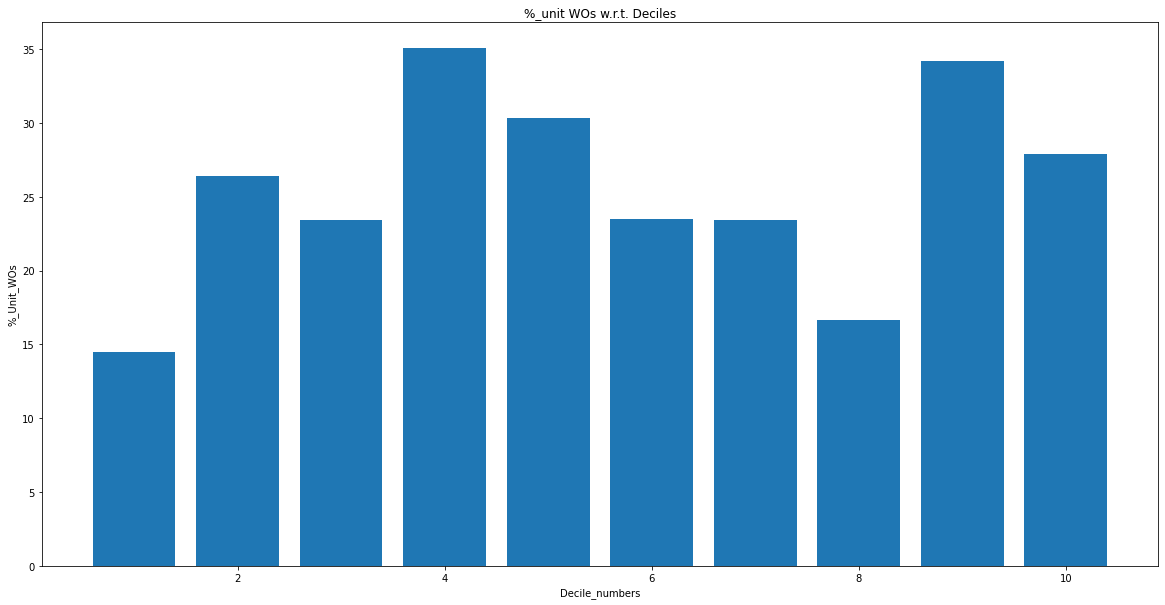

In [299]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

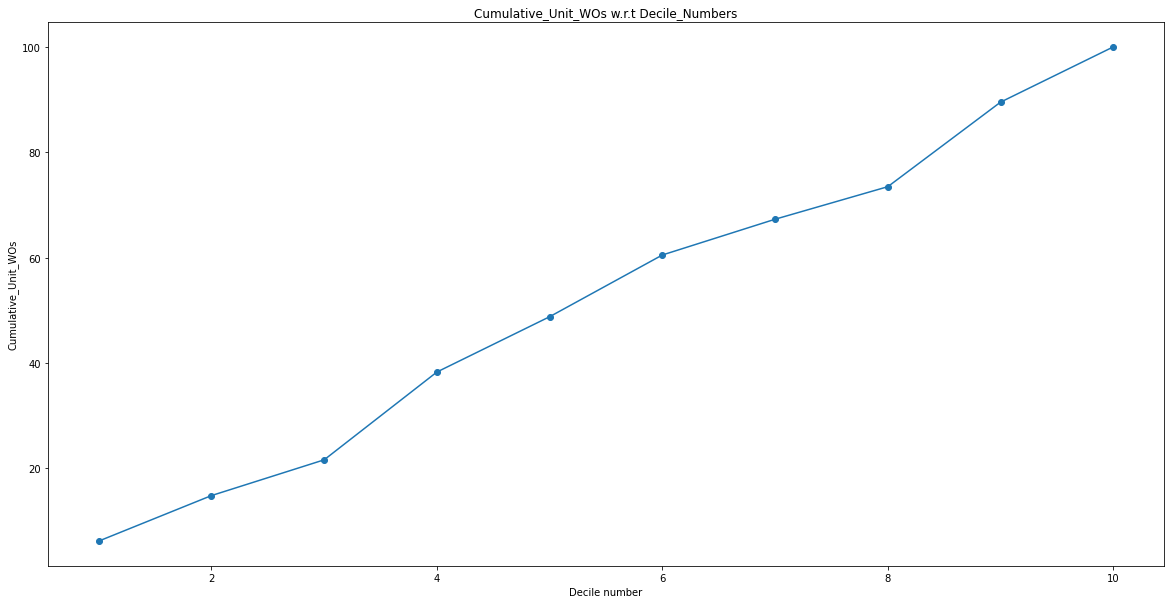

In [300]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [301]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [302]:
check['Predicted Values'] = predict_y_test

In [303]:
check

,WriteOff_YN,Predicted Values
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
481,0,1
482,0,1
483,0,1
484,0,1


In [304]:
print(predict_y_proba_test)

[[0.48743167 0.51256833]
 [0.49116113 0.50883887]
 [0.48106469 0.51893531]
 [0.49345423 0.50654577]
 [0.48929525 0.51070475]
 [0.50437299 0.49562701]
 [0.47406233 0.52593767]
 [0.47132943 0.52867057]
 [0.48159772 0.51840228]
 [0.48958852 0.51041148]
 [0.49263334 0.50736666]
 [0.49389368 0.50610632]
 [0.48894162 0.51105838]
 [0.47044666 0.52955334]
 [0.50778235 0.49221765]
 [0.4990607  0.5009393 ]
 [0.3619701  0.6380299 ]
 [0.46808472 0.53191528]
 [0.43809073 0.56190927]
 [0.55777114 0.44222886]
 [0.36046526 0.63953474]
 [0.48618726 0.51381274]
 [0.49587091 0.50412909]
 [0.00314539 0.99685461]
 [0.47341658 0.52658342]
 [0.45718031 0.54281969]
 [0.47358926 0.52641074]
 [0.47865429 0.52134571]
 [0.48301506 0.51698494]
 [0.46571776 0.53428224]
 [0.49113325 0.50886675]
 [0.49680176 0.50319824]
 [0.46143656 0.53856344]
 [0.48220578 0.51779422]
 [0.48603753 0.51396247]
 [0.21691811 0.78308189]
 [0.48228918 0.51771082]
 [0.4727139  0.5272861 ]
 [0.49232186 0.50767814]
 [0.48192108 0.51807892]


In [305]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [306]:
check['Predicted_Prob_WO = 1'] = write_off1

In [307]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,1,0.512568
1,0,1,0.508839
2,0,1,0.518935
3,0,1,0.506546
4,0,1,0.510705
...,...,...,...
481,0,1,0.532536
482,0,1,0.510174
483,0,1,0.504983
484,0,1,0.512508


In [308]:
check['OpportunityID'] = None

In [309]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [310]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,1,0.512568,0062M00000nqf6oQAA
1,0,1,0.508839,0062M00000nqfF3QAI
2,0,1,0.518935,0062M00000nqjtvQAA
3,0,1,0.506546,0062M00000nqs8FQAQ
4,0,1,0.510705,0062M00000nr94cQAA
...,...,...,...,...
481,0,1,0.532536,0062M00000oYVfWQAW
482,0,1,0.510174,0062M00000oYVWyQAO
483,0,1,0.504983,0062M00000oYYg7QAG
484,0,1,0.512508,0062M00000oYZI3QAO


In [311]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9968546057293539
Min_propability_value:  0.4239473394833777


In [312]:
check['Decile'] = None

In [313]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data_test['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data_test['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data_test['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data_test['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data_test['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data_test['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data_test['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data_test['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data_test['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data_test['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data_test['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data_test['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [314]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
0,0,1,0.512568,0062M00000nqf6oQAA,5
1,0,1,0.508839,0062M00000nqfF3QAI,3
2,0,1,0.518935,0062M00000nqjtvQAA,7
3,0,1,0.506546,0062M00000nqs8FQAQ,2
4,0,1,0.510705,0062M00000nr94cQAA,4
...,...,...,...,...,...
481,0,1,0.532536,0062M00000oYVfWQAW,8
482,0,1,0.510174,0062M00000oYVWyQAO,4
483,0,1,0.504983,0062M00000oYYg7QAG,2
484,0,1,0.512508,0062M00000oYZI3QAO,5


In [315]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [316]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
172,0,0,0.423947,0062M00000oAQHGQA4,1
19,1,0,0.442229,0062M00000o8EArQAM,1
205,1,0,0.487543,0062M00000oB5NeQAK,1
14,0,0,0.492218,0062M00000o8DaJQAU,1
387,0,0,0.492267,0062M00000oQDyvQAG,1
...,...,...,...,...,...
71,0,1,0.934453,0062M00000o92d1QAA,10
478,1,1,0.955228,0062M00000oYT4ZQAW,10
290,0,1,0.959852,0062M00000oPA8rQAG,10
320,0,1,0.994539,0062M00000oPQnBQAW,10


In [317]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [318]:
exp_df = check.copy()

In [319]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
172,0,0,0.423947,0062M00000oAQHGQA4,1
19,1,0,0.442229,0062M00000o8EArQAM,1
205,1,0,0.487543,0062M00000oB5NeQAK,1
14,0,0,0.492218,0062M00000o8DaJQAU,1
387,0,0,0.492267,0062M00000oQDyvQAG,1
...,...,...,...,...,...
71,0,1,0.934453,0062M00000o92d1QAA,10
478,1,1,0.955228,0062M00000oYT4ZQAW,10
290,0,1,0.959852,0062M00000oPA8rQAG,10
320,0,1,0.994539,0062M00000oPQnBQAW,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [320]:
N = len(exp_df)
N

486

In [321]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [322]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    34
1     8
Name: WriteOff_YN, dtype: int64

In [323]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [324]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(8, 11, 10, 15, 13, 16, 8, 14, 12, 7)

In [325]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [326]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(8, 19, 29, 44, 57, 73, 81, 95, 107, 114)

In [327]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [328]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

19.047619047619047 27.5 26.31578947368421 22.727272727272727 26.53061224489796 28.571428571428573 20.512820512820515 22.950819672131146 25.53191489361702 14.583333333333334


In [329]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [330]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

7.017543859649122 16.666666666666664 25.438596491228072 38.59649122807017 50.0 64.03508771929825 71.05263157894737 83.33333333333334 93.85964912280701 100.0


In [331]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.7017543859649122 0.8333333333333333 0.847953216374269 0.9649122807017543 1.0 1.067251461988304 1.0150375939849625 1.0416666666666667 1.0428849902534112 1.0


In [332]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [333]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [334]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [335]:
no_of_opps

[42, 40, 38, 66, 49, 56, 39, 61, 47, 48]

In [336]:
sum(no_of_opps)

486

In [337]:
funded_amt

[750500,
 253000,
 386000,
 588800,
 607000,
 578500,
 642500,
 1022564,
 1366537,
 8073000]

In [338]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.05259875, 0.01773149, 0.02705279, 0.04126601, 0.04254156,
       0.04054414, 0.04502957, 0.07166633, 0.09577366, 0.5657957 ])

In [339]:
gross_amt

[258571.76,
 30458.020000000004,
 60685.67,
 64209.83,
 74705.28000000001,
 49844.13999999999,
 63448.56999999999,
 93651.16999999998,
 182954.18000000002,
 115385.71999999999]

In [340]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.2601549747234757,
 0.29079948680486895,
 0.35185673043010934,
 0.41645971221222144,
 0.49162240681626557,
 0.5417717385987207,
 0.6056087992452147,
 0.699833388056359,
 0.8839077822340303,
 1.0]

In [341]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.3445326582278481,
 0.12038743083003954,
 0.15721676165803108,
 0.10905202105978261,
 0.12307294892915982,
 0.08616100259291269,
 0.0987526381322957,
 0.0915846538700756,
 0.13388161462148485,
 0.014292793261488912]

In [342]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,42,8,19.047619,7.017544,750500,0.052599,258571.76,0.344533,0.260155,416707.05,49.22,7.99,50.45
1,2,40,11,27.500000,16.666667,253000,0.017731,30458.02,0.120387,0.290799,56128.02,50.56,50.45,50.67
2,3,38,10,26.315789,25.438596,386000,0.027053,60685.67,0.157217,0.351857,105017.67,50.79,50.68,50.90
3,4,66,15,22.727273,38.596491,588800,0.041266,64209.83,0.109052,0.416460,134394.33,51.02,50.90,51.16
4,5,49,13,26.530612,50.000000,607000,0.042542,74705.28,0.123073,0.491622,143550.28,51.29,51.16,51.44
5,6,56,16,28.571429,64.035088,578500,0.040544,49844.14,0.086161,0.541772,106447.50,51.64,51.44,51.85
6,7,39,8,20.512821,71.052632,642500,0.045030,63448.57,0.098753,0.605609,118008.57,52.10,51.86,52.40
7,8,61,14,22.950820,83.333333,1022564,0.071666,93651.17,0.091585,0.699833,201142.11,52.95,52.40,53.57
8,9,47,12,25.531915,93.859649,1366537,0.095774,182954.18,0.133882,0.883908,324358.77,54.85,53.58,57.05
9,10,48,7,14.583333,100.000000,8073000,0.565796,115385.72,0.014293,1.000000,313015.72,66.42,57.05,100.00


In [343]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,42,8,19.05,7.02,750500,5.26,258571.76,34.45,26.02,416707.05,49.22,7.99,50.45
1,2,40,11,27.50,16.67,253000,1.77,30458.02,12.04,29.08,56128.02,50.56,50.45,50.67
2,3,38,10,26.32,25.44,386000,2.71,60685.67,15.72,35.19,105017.67,50.79,50.68,50.90
3,4,66,15,22.73,38.60,588800,4.13,64209.83,10.91,41.65,134394.33,51.02,50.90,51.16
4,5,49,13,26.53,50.00,607000,4.25,74705.28,12.31,49.16,143550.28,51.29,51.16,51.44
5,6,56,16,28.57,64.04,578500,4.05,49844.14,8.62,54.18,106447.50,51.64,51.44,51.85
6,7,39,8,20.51,71.05,642500,4.50,63448.57,9.88,60.56,118008.57,52.10,51.86,52.40
7,8,61,14,22.95,83.33,1022564,7.17,93651.17,9.16,69.98,201142.11,52.95,52.40,53.57
8,9,47,12,25.53,93.86,1366537,9.58,182954.18,13.39,88.39,324358.77,54.85,53.58,57.05
9,10,48,7,14.58,100.00,8073000,56.58,115385.72,1.43,100.00,313015.72,66.42,57.05,100.00


<BarContainer object of 10 artists>

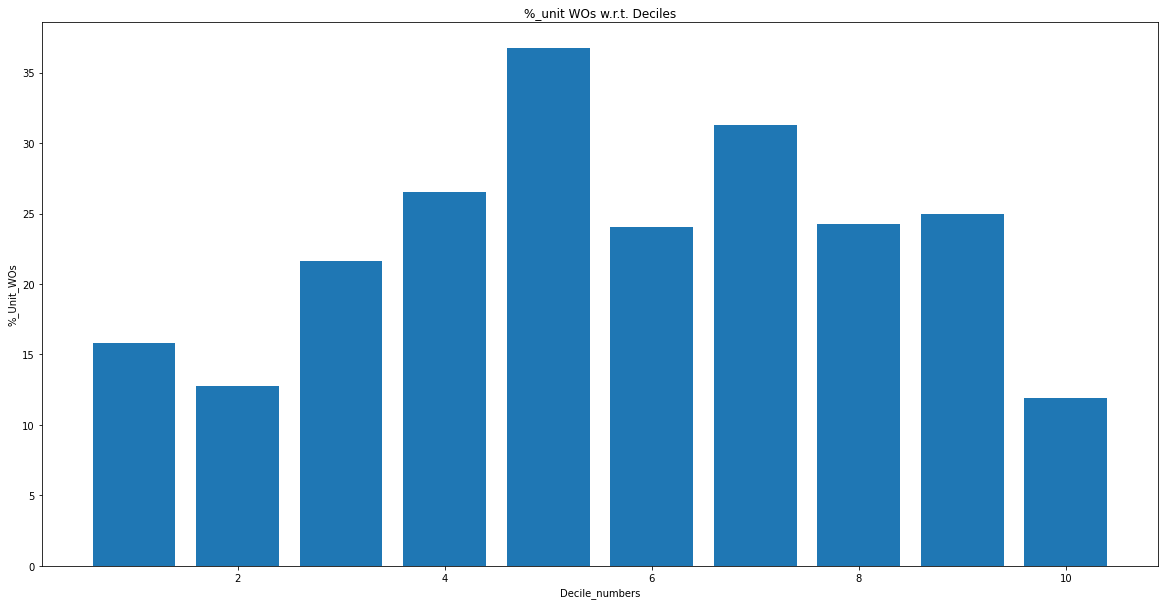

In [188]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

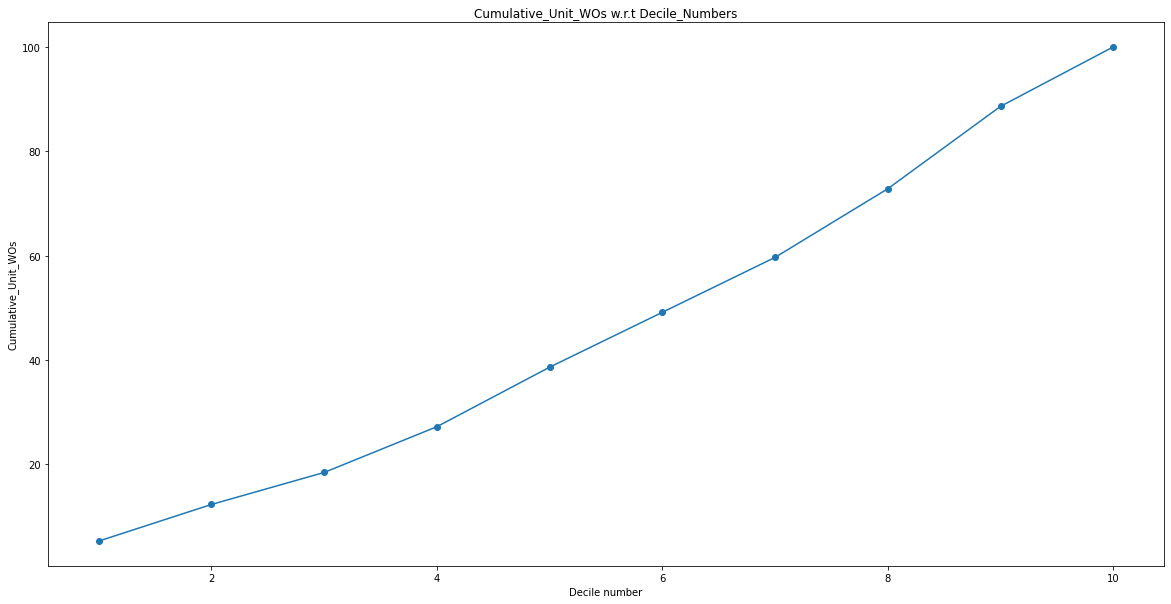

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}